# HW05 - Taming Text

## 1. Generate a word cloud based on the raw corpus

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk

from wordcloud import WordCloud

#pd.set_option('display.max_colwidth', -1)

Getting the data

In [2]:
emails=pd.DataFrame.from_csv('./hillary-clinton-emails/Emails.csv')
emails.head(3)

,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
Id,,,,,,,,,,,,,,,,,,,,,
1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...


The fields that contains relevant english words are 'ExtractedBodyText' and 'ExtractedSubject'

## Using Python word_cloud library

### WordCloud based on e-mail body only

In [3]:
wordcloud = WordCloud().generate(' '.join(list(emails.ExtractedBodyText.dropna())))

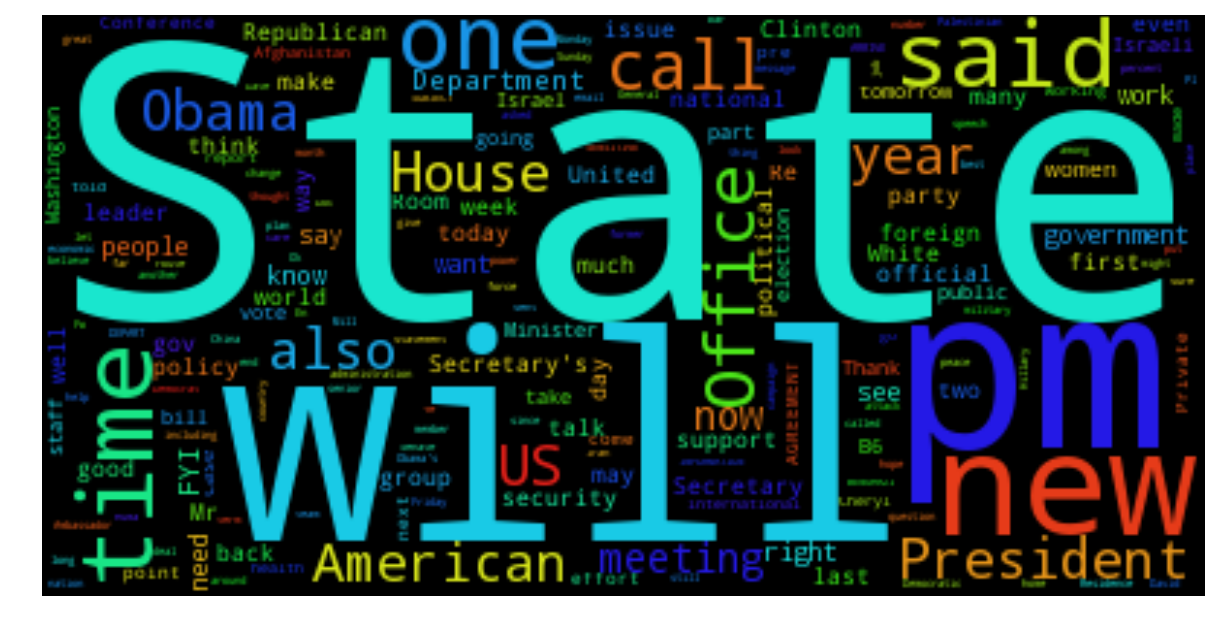

In [4]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
plt.close()

### WordCloud based on e-mail body and subject

In [5]:
wordcloud2 = WordCloud().generate(' '.join(list(emails.ExtractedBodyText.dropna())) + ' '.join(list(emails.ExtractedSubject.dropna())))

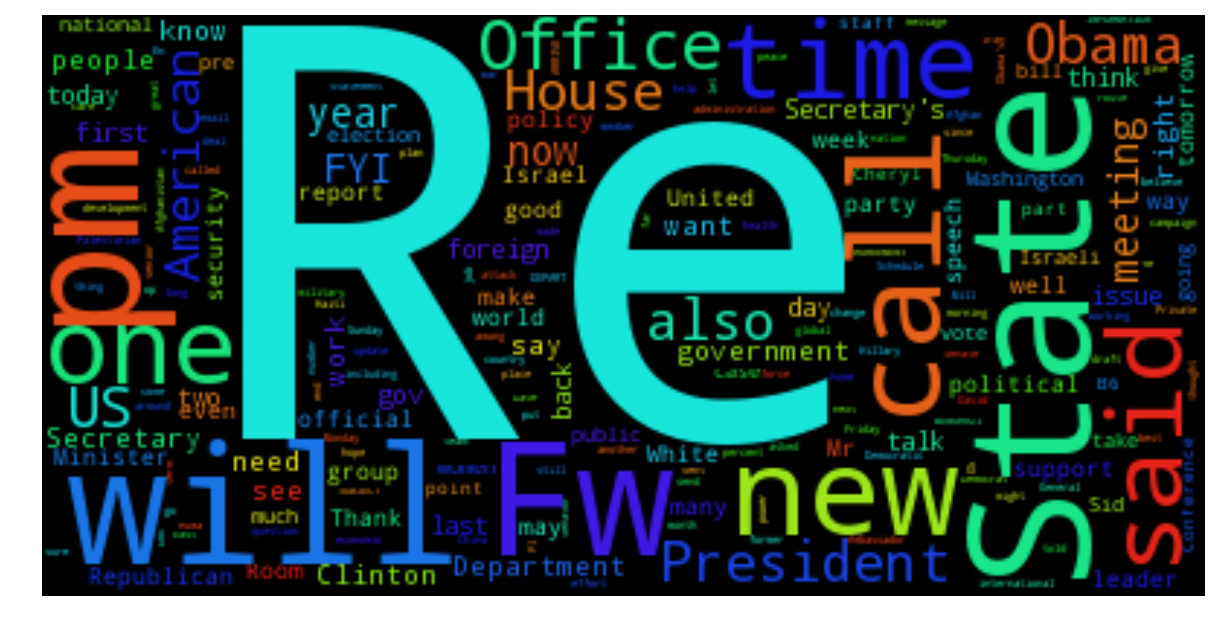

In [6]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

What we can see is that there aren't many changes except that the e-mail keywords 'Re' and 'Fw' become very important and should be excluded from the cloud are they aren't content related words.

Is it relevant to keep the subject, as the terms should also appear in the body?

In [7]:
emails_=emails[['ExtractedSubject', 'ExtractedBodyText']].copy()

small_words=list()
for i in range(len(emails_['ExtractedBodyText'])):
    s=str(emails_['ExtractedSubject'].iloc[i])
    e=str(emails_['ExtractedBodyText'].iloc[i])
    #take the bodytext that are less than 5 chars and smaller (i.e fewer information) than their subject
    if (len(e)<=5 and len(e)<len(s)):
        small_words.append(e)
print(len(small_words), "short text bodies, consting of " , set(small_words))

1506 short text bodies, consting of  {'302', 'Thx.', '70', '111A', 'Ahmet', '5', 'Also,', '43', 'nice', '10', 'Ok', '98', 'Wow', 'Yes!', '62', 'Sid', '###\n5', '16', 'Call', '2cin', 'fyi\nc', '291', '130', 'done', '202', '4', '35', '4.-', '3pm', '169', '67', 'great', '14.0', '--', '1 A', 'Yes.', '92', '8', '94', 'fvi', 'Thx', 'yep', '34', 'Yes', 'More.', 'Nice.', '!?', '1/7', 'agree', 'Mike.', '15', 'Yeah!', '###', '19', 'Yep.', 'Fyi.', 'fYI', 'Aye', 'fvl', 'yes', 'Copy', '----', 'fyl', 'XO', 'FY1', 'sigh', 'FYI', 'Yep', 'B4\nB5', 'A)', 'Fyi', 'B6', '120', '18', 'FYI\n^', 'More', 'Ok\n•', 'Great', 'AM', 'No.', 'rshah', 'FYi', 'Tx', '167', 'this', '-', 'FY/', 'Y', '72', 'Dyi', '-----', 'ok', 'Nice!', '_', '281', 'fyi', '21', 'Done', 'Jm', 'k', '-^', 'state', '17', 'Nice', 'FYI.', 'ok\n>', '241', 'B5', 'Roger', '--•', 'FFYI', 'FYI\n•', 'I', '147', 'Good.', '2', 'Fyi,', 'Nope.', 'K', 'Done.', 'I did', 'Ok.', '53', 'I 96', 'nan'}


So we can conclude that the subject might be interesting to keep for the cloud, removing the email subject tags

## Using Natural Language Toolkit

### Pre-processing

In [8]:
from nltk.corpus import stopwords

In [9]:
#concatenate all words
concatenated_words = ' '.join(list(emails.ExtractedBodyText.dropna())) + ' '.join(list(emails.ExtractedSubject.dropna()))

### Tokenization with punctuation removal

In [10]:
from nltk.tokenize import RegexpTokenizer

#We only tokenize alphanumerical characters
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(concatenated_words)

### Stopword removal

#### We first remove common english stopwords

In [11]:
from nltk.corpus import stopwords

english_stopwords = stopwords.words('english')

In [12]:
english_filtered_tokens = [token for token in tokens if token.lower() not in english_stopwords]
english_filtered_tokens[:10]

['B6', 'Thursday', 'March', '3', '2011', '9', '45', 'PM', 'H', 'Latest']

#### We further filter tokens by removing e-mail specific words and other arbitrary words.

In [13]:
email_stopwords = ['re', 'fw', 'fwd', 'subject', 'sent', 'to', 'from', 'date', 'attachments']
arbitrary_stopwords = ['state', 'pm', 'am', 'department', 'case', 'call', 'new', 'said', 'one', 'also', "a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thickv", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the"]
extended_stopwords = english_stopwords+email_stopwords+arbitrary_stopwords

In [14]:
filtered_tokens = [token for token in tokens if token.lower() not in extended_stopwords]
filtered_tokens[:10]

['B6', 'Thursday', 'March', '3', '2011', '9', '45', 'H', 'Latest', 'Syria']

### Stemming (we try different stemmers)

#### Using Porter Stemmer

In [15]:
from nltk.stem.porter import *

stemmer = PorterStemmer()
porter_stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

##### We generate the corresponding WordCloud (Porter Stemmer)

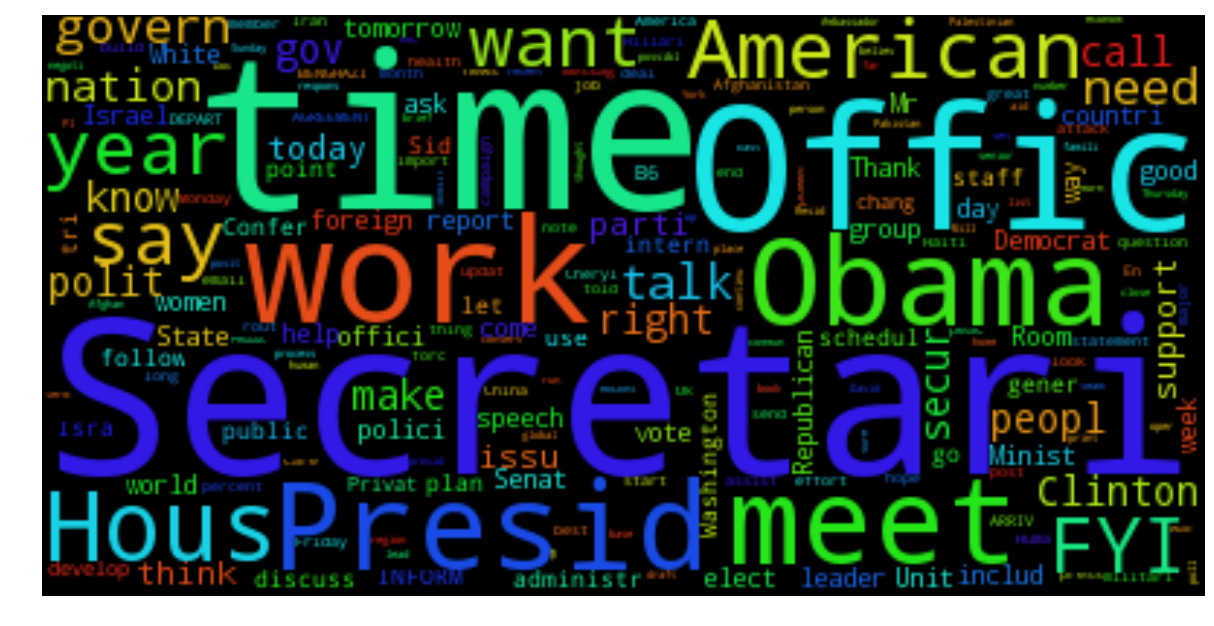

In [16]:
porter_filtered_wordcloud = WordCloud().generate(' '.join(porter_stemmed_tokens))

plt.figure(figsize=(15,10))
plt.imshow(porter_filtered_wordcloud)
plt.axis('off')
plt.show()

#### Using Snowball Stemmer

In [17]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english", ignore_stopwords=True)
snowball_stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

##### We generate the corresponding WordCloud (Snowball Stemmer)

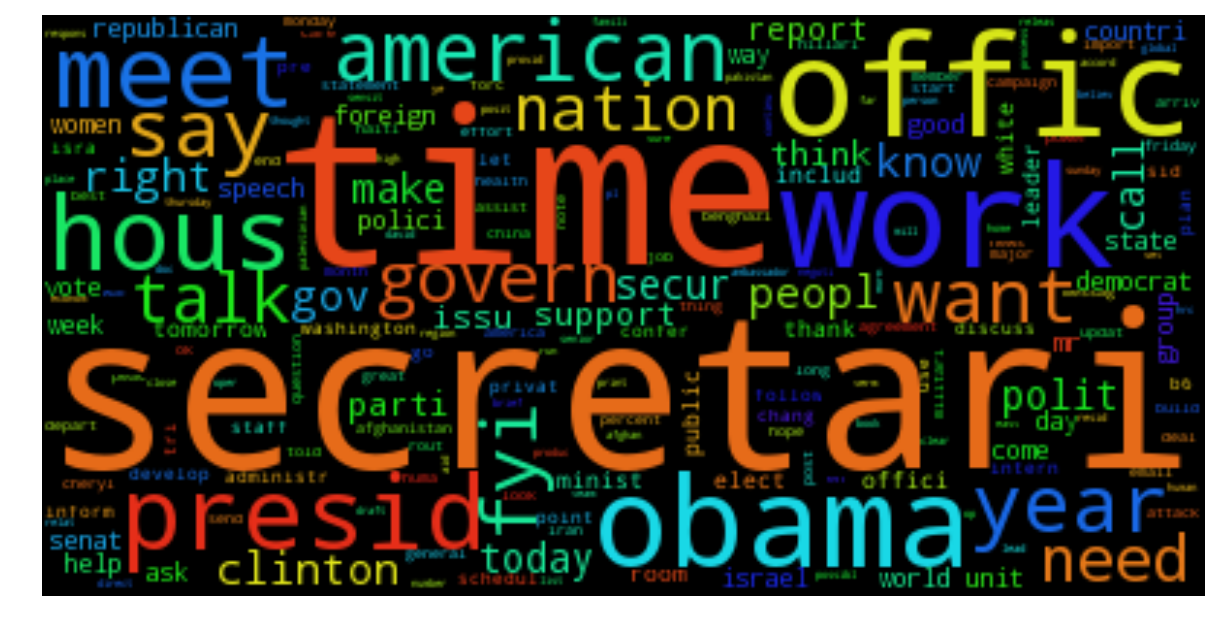

In [18]:
snowball_filtered_wordcloud = WordCloud().generate(' '.join(snowball_stemmed_tokens))

plt.figure(figsize=(15,10))
plt.imshow(snowball_filtered_wordcloud)
plt.axis('off')
plt.show()

The preprocessing steps change the word cloud a lot. Removing the email specific stopwords guarantee that the word cloud highlights actual content of the emails.
For the stemming step, we tried both the Porter Stemmer and the Snowball Stemmer. The latter is supposedly more efficient and more accurate than the former, although based on our resulting word clouds we can't really determine which is best.

## 2. World Countries mentions in whole corpus

In [69]:
import pycountry

### We start by building a DataFrame which will contain the frequency and sentiment for each country

In [70]:
countries = list(c.name for c in list(pycountry.countries))

In [71]:
countries_df = pd.DataFrame({'Country' : countries,
                             'Sentiment' : 0,
                             'Frequency' : 0})  

In [72]:
countries_df.sample(10)

,Country,Frequency,Sentiment
61,Dominica,0,0
104,India,0,0
144,"Macedonia, Republic of",0,0
34,Brunei Darussalam,0,0
135,Macao,0,0
182,Portugal,0,0
167,Norway,0,0
103,Isle of Man,0,0
235,Uzbekistan,0,0
22,Bangladesh,0,0


### We then lookup every token in the countries list and increment the frequency when a country token is found.

In [73]:
errors = list()

In [74]:
good_tokens = list(set(filtered_tokens)-set(errors))
good_tokens[:10]

['visage',
 'unholy',
 'amounted',
 'influence',
 'confronting',
 'reissue',
 'reemerged',
 'contrived',
 'synthesising',
 'HuffPost']

In [75]:
error_count = 0
for token in filtered_tokens:
    #if token not in errors:
        try:
            country = pycountry.countries.lookup(token)
            
            countries_df.loc[countries_df['Country'] == country.name, 'Frequency']+=1
        except LookupError:
            errors.append(token)

In [76]:
pycountry.countries.lookup('sy')
#Note to team : entry for 'Syria' ?

Country(alpha_2='SY', alpha_3='SYR', name='Syrian Arab Republic', numeric='760')

In [77]:
sorted_countries_df = (((countries_df.set_index('Frequency')).sort_index(ascending=False)).reset_index())[['Country', 'Frequency', 'Sentiment']]
sorted_countries_df.head(20)

,Country,Frequency,Sentiment
0,United States,1048,0
1,Israel,594,0
2,Mauritania,536,0
3,Comoros,473,0
4,Afghanistan,466,0
5,China,399,0
6,Haiti,377,0
7,Pakistan,335,0
8,Libya,225,0
9,Albania,218,0


In [78]:
errors[:20]

['B6',
 'Thursday',
 'March',
 '3',
 '2011',
 '9',
 '45',
 'H',
 'Latest',
 'Syria',
 'aiding',
 'Qaddafi',
 'Sid',
 'hrc',
 'memo',
 'syria',
 'aiding',
 '030311',
 'docx',
 'hrc']

### Sentiment Analysis

In [79]:
import nltk.sentiment.util

Negative


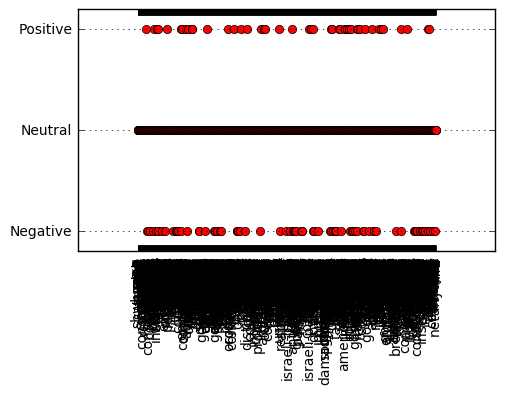

In [99]:
text = (emails.sample(1)['ExtractedBodyText']).str.cat()
sentiment = nltk.sentiment.util.demo_liu_hu_lexicon(text, plot = True)
sentiment

In [83]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [102]:
email_tokenizer = RegexpTokenizer(r'\w+')

emails_df = emails.dropna(axis=0)
for (index, email) in emails_df.iterrows():
    content = email['ExtractedSubject'] + " " + email['ExtractedBodyText']
    email_tokens = email_tokenizer.tokenize(content)
    filtered_email_tokens = [token for token in email_tokens if token.lower() not in extended_stopwords]

    for token in filtered_email_tokens:
        if token not in errors:
            try:
                country = pycountry.countries.lookup(token)
                sentiment = sid.polarity_scores(content)["compound"]
                countries_df.loc[countries_df['Country'] == country.name, 'Sentiment']+=sentiment
            except LookupError:
                break
    #Average the total sentiment of a country over its occurence frequency
    countries_df.loc[countries_df['Country'] == country.name, 'Sentiment']/=countries_df.loc[countries_df['Country'] == country.name]['Frequency']
    

In [103]:
countries_df.head(50)

,Country,Frequency,Sentiment
0,Aruba,3,0.000000e+00
1,Afghanistan,466,1.157688e-18
2,Angola,194,3.742623e-14
3,Anguilla,7,1.444140e-03
4,Åland Islands,4,0.000000e+00
5,Albania,218,4.248998e-01
6,Andorra,44,0.000000e+00
7,United Arab Emirates,3,0.000000e+00
8,Argentina,35,3.229000e+00
9,Armenia,41,1.046968e-02


Je pense qu'il faut qu'on traite particulierement certains pays dont le nom dans pycountry n'est pas le nom commun qui pourrait utilisé dans les mails
Par exemple la Russie ou la Syrie. Parce que du coup on manque surement énormément de références aux pays qui ont ce genre de noms et ca fausse surement le sentiment qu'on obtient vu qu'on ne peut probablement pas les lier au texte qui correspond.

In [88]:
countries_df[countries_df['Country']=='Russian Federation']

,Country,Frequency,Sentiment
189,Russian Federation,3,0.0


In [89]:
countries_df[countries_df['Country']=='Syrian Arab Republic']

,Country,Frequency,Sentiment
214,Syrian Arab Republic,1,0.9802
